# Theory

1] What is Logistic Regression, and how does it differ from Linear Regression?

Logistic Regression is a classification algorithm used to predict the probability of a binary outcome (0 or 1). It uses the logistic (sigmoid) function to constrain outputs between 0 and 1.

Linear Regression, on the other hand, is used for regression problems where the output is a continuous value (like predicting AQI or house price).

Key Differences:

Output: Linear Regression → continuous | Logistic Regression → probability (then thresholded to classify).

Function used: Linear uses linear function; Logistic uses sigmoid.

Cost Function: Linear uses MSE; Logistic uses log loss (cross-entropy).



2] What is the mathematical equation of Logistic Regression?

The prediction is made using the sigmoid function applied to a linear combination of inputs:

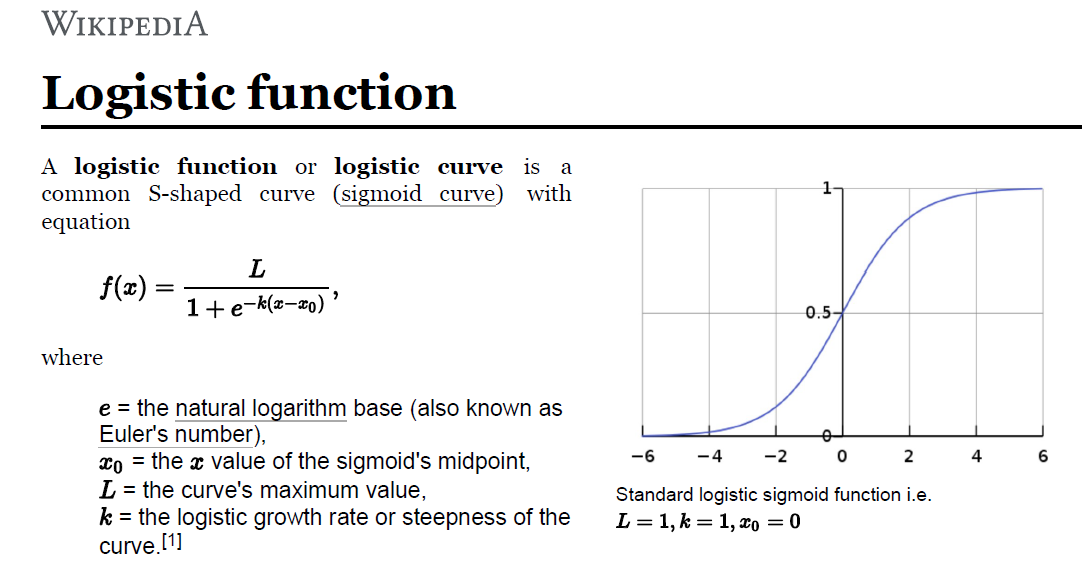

3] Why do we use the Sigmoid function in Logistic Regression?

The sigmoid function converts the raw linear output
x (which can be any real number) into a probability between 0 and 1:

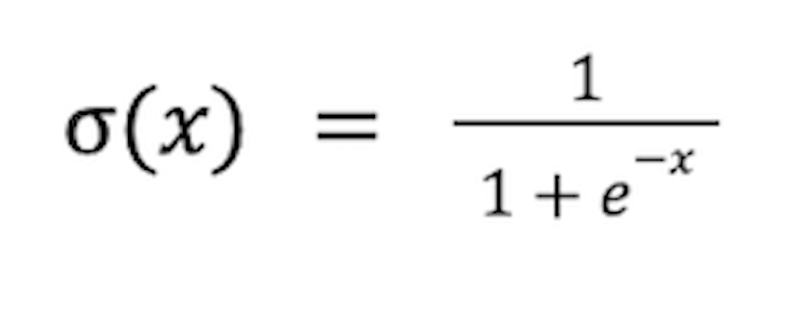

Why it's used:

Interprets outputs as probabilities.

It has a nice "S"-shaped curve, smoothly transitioning from 0 to 1.

Suitable for binary classification problems.

4] What is the cost function of Logistic Regression?

Logistic Regression uses the Log Loss (Cross-Entropy Loss):
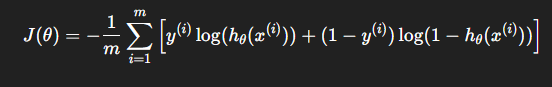

Where:

ℎ𝜃(𝑥)is the predicted probability,

𝑦(𝑖) is the true label.

It penalizes confident wrong predictions heavily, which is good for classification.

5] What is Regularization in Logistic Regression? Why is it needed?

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function.

In logistic regression, it discourages large coefficient values which could lead to a model too tightly fitted to the training data.

Two common types:

L1 Regularization (Lasso): Adds absolute value of coefficients.

L2 Regularization (Ridge): Adds square of coefficients.



6] Explain the difference between Lasso, Ridge, and Elastic Net Regression.

Lasso (L1): Encourages sparsity. Shrinks some coefficients to zero — great for feature selection.

Ridge (L2): Shrinks all coefficients but doesn't eliminate them. Helps with multicollinearity.

Elastic Net: Combines both L1 and L2 penalties. Provides a balance between shrinkage and sparsity.

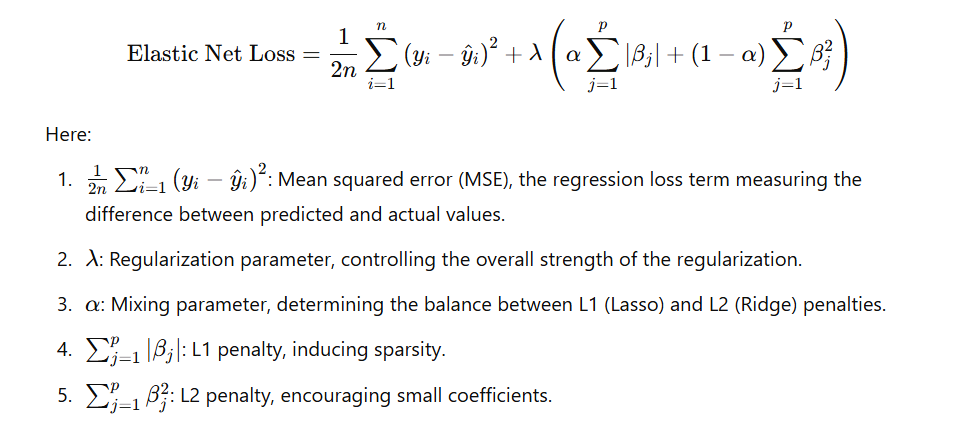

7] When should we use Elastic Net instead of Lasso or Ridge?

Use Elastic Net when:

You have many features, some of which may be highly correlated.

You want the benefits of both Ridge and Lasso — i.e., feature selection and multicollinearity handling.

Lasso is too aggressive, and Ridge is too soft.



8] What is the impact of the regularization parameter (λ) in Logistic Regression?

λ (lambda) controls the strength of regularization.

High λ: More penalty → Smaller coefficients → Prevents overfitting, but may underfit.

Low λ: Less penalty → Larger coefficients → May overfit.

In practice, you tune λ using cross-validation.

9] What are the key assumptions of Logistic Regression?

Linearity of log-odds: Logit (log-odds) should be linearly related to the features.

Independence of errors: Observations are independent.

No multicollinearity: Features should not be highly correlated.

Large sample size: Reliable estimates require enough data.

10] What are some alternatives to Logistic Regression for classification tasks?

Decision Trees

Random Forest

Gradient Boosting (e.g., XGBoost, LightGBM)

Support Vector Machines (SVM)

Naive Bayes

Neural Networks

k-Nearest Neighbors (k-NN)

These models can capture non-linear relationships and complex patterns better than logistic regression.

11] What are Classification Evaluation Metrics?

Accuracy

Precision: TP / (TP + FP)

Recall (Sensitivity): TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall

AUC-ROC

Confusion Matrix

Log Loss

Each is useful depending on class imbalance and business needs.

12] How does class imbalance affect Logistic Regression?

Class imbalance can cause the model to:

Be biased toward the majority class.

Show high accuracy but poor precision/recall for the minority class.

Solutions:

Use class weights.

Resampling techniques: Oversampling minority or undersampling majority class.

Use AUC-ROC, F1-score for evaluation.

13] What is Hyperparameter Tuning in Logistic Regression?

It involves searching for the best values of:

Regularization type (L1, L2)

λ (penalty strength)

Solver

You can use GridSearchCV or RandomizedSearchCV in scikit-learn for this purpose.

14] What are different solvers in Logistic Regression? Which one should be used?

Common solvers in scikit-learn:

liblinear: Good for small datasets and L1 regularization.

lbfgs: Default, good for L2 regularization.

newton-cg: Handles multiclass problems.

saga: Supports L1, L2, and ElasticNet; scalable for large datasets.

Use based on:

Dataset size

Regularization type

Binary vs multiclass



15] How is Logistic Regression extended for multiclass classification?

Two approaches:

One-vs-Rest (OvR): Trains one classifier per class against all others.

Softmax Regression (Multinomial Logistic Regression): Generalizes the sigmoid function for multiple classes.

Most libraries like scikit-learn support both.



16] What are the advantages and disadvantages of Logistic Regression?

Advantages:

Simple and easy to implement.

Works well with linearly separable data.

Probabilistic interpretation.

Fast to train.

Disadvantages:

Poor performance on non-linear problems.

Assumes linear decision boundary.

Sensitive to multicollinearity.

17] What are some use cases of Logistic Regression?

Predicting disease presence (yes/no).

Email spam detection.

Customer churn prediction.

Credit card fraud detection.

Predicting product success/failure.



18] What is the difference between Softmax Regression and Logistic Regression?

Logistic Regression: Used for binary classification.

Softmax Regression: Extension of logistic regression for multiclass classification.

Softmax outputs probabilities for each class, summing to 1.

19] How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

OvR: Simpler and often sufficient. Trains separate binary classifiers.

Softmax: Better when classes are mutually exclusive and probabilities are needed for each class.

Use Softmax if you care about joint class probabilities and have enough data.

20] How do we interpret coefficients in Logistic Regression?

Each coefficient represents the change in the log-odds of the outcome for a one-unit change in the corresponding feature, holding other features constant.

To interpret in terms of odds:

Odds ratio =𝑒𝛽𝑖

𝑒𝛽𝑖>1: Positive impact.

𝑒𝛽𝑖<1: Negative impact.

# Practical

In [19]:
#1] Logistic Regression with Train-Test Split and Accuracy:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


In [5]:
#2] Logistic Regression with L1 Regularization (Lasso):

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


In [18]:
#3] Logistic Regression with L2 Regularization (Ridge):

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='l2', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(model.coef_)

0.956140350877193
[[ 2.10967128e+00  1.44951084e-01 -1.72412464e-01  1.85947192e-03
  -1.55862493e-01 -3.89416736e-01 -6.70447161e-01 -3.77723987e-01
  -2.17550463e-01 -2.48716247e-02 -5.53886302e-02  1.20476829e+00
  -2.27837863e-01 -7.20889983e-02 -2.06164826e-02  3.17841502e-02
  -1.87423164e-02 -4.05496985e-02 -3.95623657e-02  1.02321561e-02
   1.20115698e+00 -3.91221313e-01 -3.57662025e-02 -2.72787901e-02
  -2.89584750e-01 -1.07010984e+00 -1.58178414e+00 -6.51156504e-01
  -7.70883032e-01 -9.99584601e-02]]


In [7]:
#4] Logistic Regression with Elastic Net Regularization:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [8]:
#5] One-vs-Rest (OvR) Multiclass Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [9]:
#6] GridSearchCV for Hyperparameter Tuning:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.9578326346840551


In [17]:
#7] Stratified K-Fold Cross-Validation:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')
data = load_breast_cancer()
X, y = data.data, data.target
model = LogisticRegression(max_iter=100)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores.mean())



0.9507840397453812


0.9

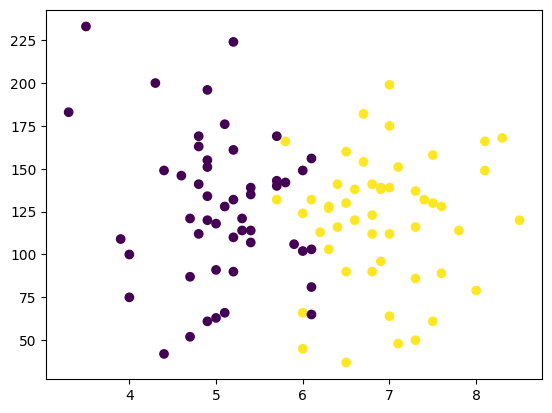

In [44]:
#8] Logistic Regression with CSV Dataset:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('placement.csv')

#df.head()
df = df.iloc[:,1:]

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

X = df.iloc[:,0:2]
y = df.iloc[:,-1]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

<Axes: >

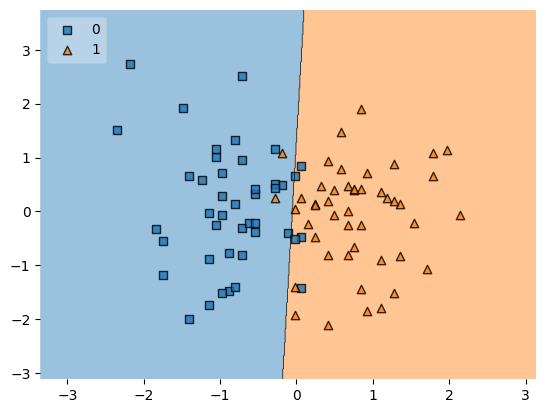

In [45]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [16]:
#9] RandomizedSearchCV for Hyperparameter Tuning:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')

data = load_breast_cancer()
X, y = data.data, data.target
param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
model = LogisticRegression(max_iter=1000)
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5)
random_search.fit(X, y)
print(random_search.best_params_)
print(random_search.best_score_)

{'C': np.float64(6.5167039380867395), 'penalty': 'l2', 'solver': 'liblinear'}
0.9543238627542306


In [20]:
#10] One-vs-One (OvO) Multiclass Logistic Regression:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings('ignore')

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


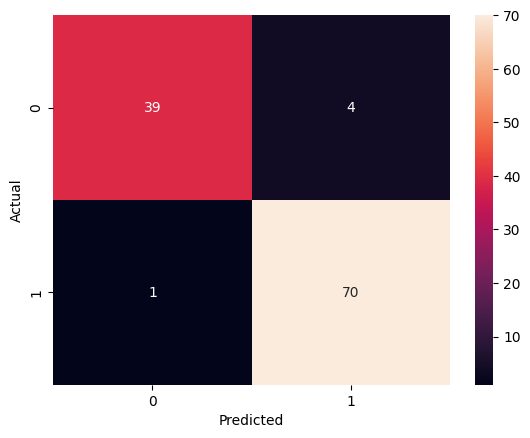

In [21]:
#11] Confusion Matrix for Binary Classification:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
#12] Precision, Recall, and F1-Score Evaluation:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(precision)
print(recall)
print(f1)

0.9459459459459459
0.9859154929577465
0.9655172413793104


In [23]:
#13] Logistic Regression with Class Weights for Imbalanced Data:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import warnings

warnings.filterwarnings('ignore')

X, y = make_classification(n_samples=1000, weights=[0.9, 0.1], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.865


In [25]:
#14] Logistic Regression on Titanic Dataset:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('Titanic-Dataset.csv')
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
imputer = SimpleImputer(strategy='mean')
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8100558659217877


In [26]:
#15] Logistic Regression with Feature Scaling:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy_scaled)
print(accuracy)

0.9736842105263158
0.956140350877193


In [27]:
#16] Logistic Regression with ROC-AUC Score:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

0.99737962659679


In [28]:
#17] Logistic Regression with Custom Learning Rate (C=0.5):

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


In [29]:
#18] Feature Importance from Logistic Regression Coefficients:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
feature_importance = pd.DataFrame({'Feature': data.feature_names, 'Coefficient': model.coef_[0]})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                    Feature  Coefficient
0               mean radius     2.159021
20             worst radius     1.268334
11            texture error     0.903038
12          perimeter error     0.268826
1              mean texture     0.114013
15        compactness error     0.100273
16          concavity error     0.023813
19  fractal dimension error     0.021321
3                 mean area    -0.002170
9    mean fractal dimension    -0.009908
10             radius error    -0.018710
23               worst area    -0.022448
14         smoothness error    -0.027927
18           symmetry error    -0.036670
17     concave points error    -0.051579
2            mean perimeter    -0.071373
29  worst fractal dimension    -0.072004
13               area error    -0.108078
22          worst perimeter    -0.166948
4           mean smoothness    -0.206632
8             mean symmetry    -0.284973
21            worst texture    -0.335158
5          mean compactness    -0.360430
24         worst

In [32]:
#19] Logistic Regression with Cohen’s Kappa Score:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.9053470607771504


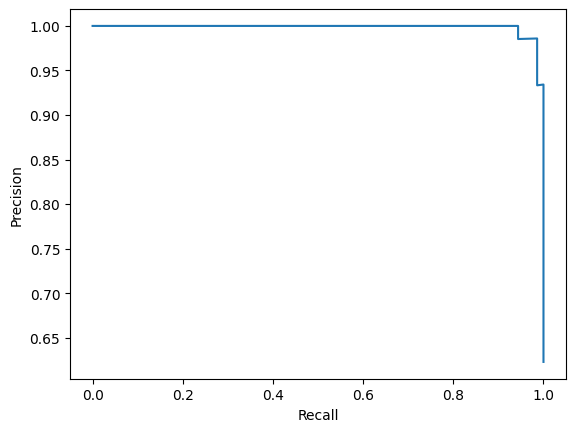

In [33]:
#20] Precision-Recall Curve Visualization:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [35]:
#21] Logistic Regression with Different Solvers:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{solver}: {accuracy}")

liblinear: 0.956140350877193
saga: 0.9649122807017544
lbfgs: 0.956140350877193


In [37]:
#22] Logistic Regression with Matthews Correlation Coefficient:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mcc = matthews_corrcoef(y_test, y_pred)
print(mcc)

0.9068106119605033


In [38]:
#23] Logistic Regression with and without Standardization:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(accuracy)
print(accuracy_scaled)

0.956140350877193
0.9736842105263158


In [39]:
#24] Optimal C via Cross-Validation:

from sklearn.linear_model import LogisticRegressionCV
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
model = LogisticRegressionCV(Cs=[0.1, 1, 10], cv=5, max_iter=1000)
model.fit(X, y)
print(model.C_)

[10.]


In [40]:
#25] Save and Load Logistic Regression Model:

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from joblib import dump, load

data = load_breast_cancer()
X, y = data.data, data.target
model = LogisticRegression(max_iter=1000)
model.fit(X, y)
dump(model, 'logistic_model.joblib')
loaded_model = load('logistic_model.joblib')
y_pred = loaded_model.predict(X)
print(y_pred[:5])

[0 0 0 1 0]
